In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from tqdm.notebook import tqdm
from scipy.stats import probplot

*   **H0: Выборки взяты из одной ГС, различий нет. M1 = M2**
*   **H1: Выборки взяты из разных ГС, различия есть. M1 != M2**

#Проведем А/А тест и найдем ошибку первого рода

Допустим, мы хотим проверить правильно ли работает наш тест, для этого найдем вероятность выявить статистически значимые различия там, где их на самом деле нет.

In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.normal(20,5,1000)
  b = np.random.normal(20,5,1000)
  _, pval = ttest_ind(a,b)
  result.append(pval)
t = pd.Series(result)
#Ошибка первого рода в А/А тесте
alfa = (t<0.05).mean()
alfa

  0%|          | 0/10000 [00:00<?, ?it/s]

0.0517

При верной нулевой гипотезе p-value имеет равномерное распределение.

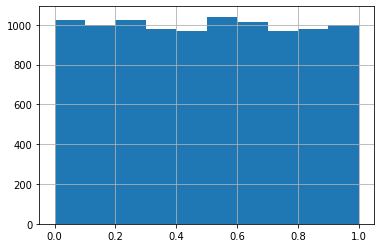

In [ ]:
t.hist()

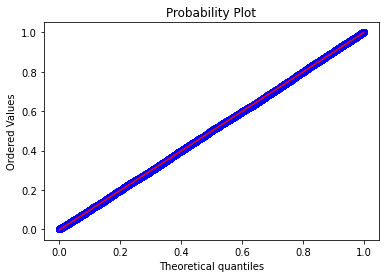

In [ ]:
probplot(t, dist='uniform', plot = plt)
plt.show()

Если мы будем многократно тянуть выборки из гененральной совокупности, то в 5% случаев мы будем получать ошибку первого рода (получать статичтически значимые различия там, где их на самом деле нет).




Проверим,что наши данные имеют нормальное распределение. Выборки мы генерим из нормального распределения. Но все равно убедимся так ли это на практике.

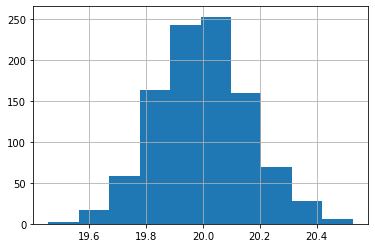

In [ ]:
# !Для t-теста нам важно не нормальность распределения признака, а нормальность распределения среднего.!
mean_data = pd.Series([np.random.normal(20,5,1000).mean() for _ in range(1000)])
mean_data.hist()

Построим график qq-plot, чтобы окончательно убедится в нормальности распределения средних значений


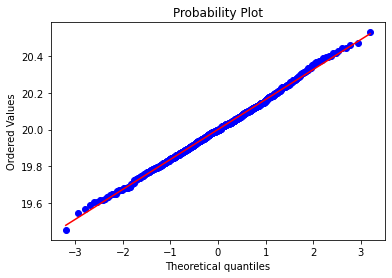

In [ ]:
probplot(mean_data, dist='norm', plot=plt)
plt.show()

Из графика выше видно,что распределение средних значение имеет нормальную форму, следовательно можно использовать t-test

---



#Проведем А/B тест и найдем мощность нашего теста

In [ ]:
result = []
for _ in tqdm(range(1000)):
  a = np.random.normal(20,5,400)
  b = np.random.normal(21,5,400)
  _, pval = ttest_ind(a,b)
  result.append(pval)
t = pd.Series(result)
#Мощность нашего теста при начальных данных: M1=20, M2=21; std1=std2=5, size1=size2=400
pow = (t < 0.05).mean()
pow

  0%|          | 0/1000 [00:00<?, ?it/s]

0.803

В данном случае мы заведомо значем, что две выборки (a и b) берем из разных ГС.
Если бы мы многократно проводили наш эксперимент, с начальными данными : *M1=20, M2=21; std1=std2=5, size1=size2=400*, то наш тест в 80% случаев показал бы статичтически значимые различия.

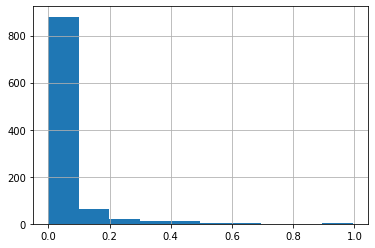

In [ ]:
t.hist()

Данная гистограмма имеет характерный жирный хвост, большинство p-value будут расположены близко к началу координат.